In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./csvs/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

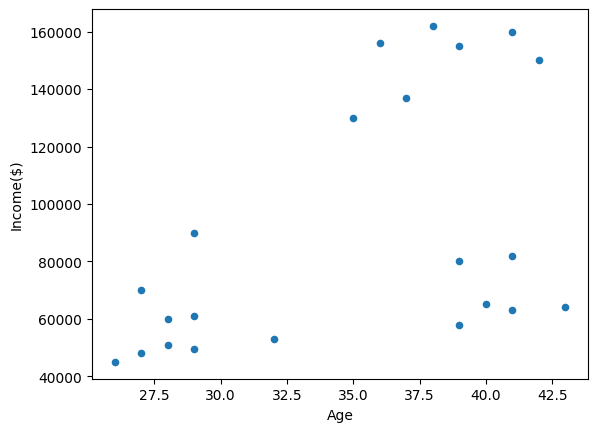

In [3]:
df.plot(kind="scatter" , x="Age" ,y="Income($)" )

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age" , "Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
df["cluster"] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [11]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

Text(0, 0.5, 'Income($)')

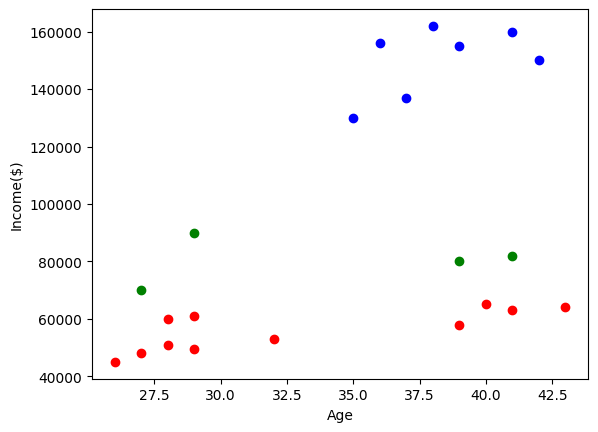

In [12]:
plt.scatter(df0.Age , df0["Income($)"] , c="red")
plt.scatter(df1.Age , df1["Income($)"] , c="blue")
plt.scatter(df2.Age , df2["Income($)"] , c="green")
plt.xlabel("Age")
plt.ylabel("Income($)")

In [22]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

In [24]:
df[["Age" , "Income($)"]] = mx.fit_transform(df[["Age" , "Income($)"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
df.cluster = km.fit_predict(df[["Age" , "Income($)"]])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [27]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

In [29]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

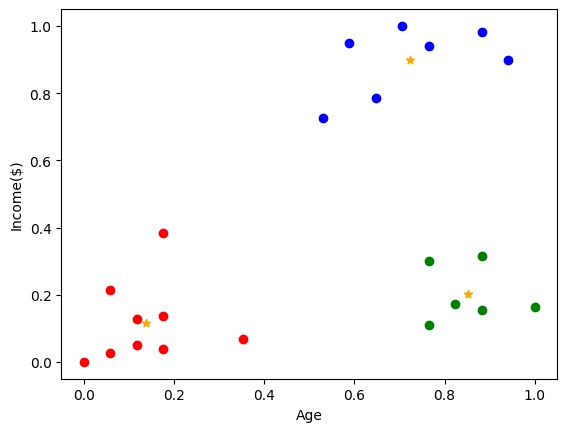

In [32]:
plt.scatter(df0.Age , df0["Income($)"] , c="red")
plt.scatter(df1.Age , df1["Income($)"] , c="blue")
plt.scatter(df2.Age , df2["Income($)"] , c="green")
plt.scatter(km.cluster_centers_[: , 0], km.cluster_centers_[:,1], c="orange" , marker="*")
plt.xlabel("Age")
plt.ylabel("Income($)")

In [33]:
k_rag = range(1, 10)
sqr_error = []
for i in k_rag:
    km = KMeans(n_clusters=i)
    km.fit(df[["Age" , "Income($)"]])
    sqr_error.append(km.inertia_)    

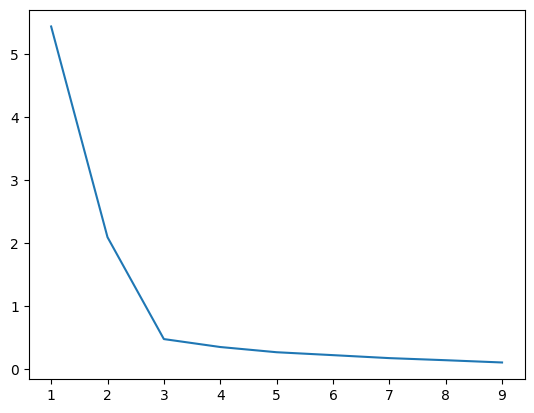

In [34]:
plt.plot(k_rag , sqr_error)